부트스트랩 샘플: 전체 샘플 중 중복을 허용하여 뽑는 샘플. 훈련세트와 크기가 같고, 내용이 다름.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

wine = pd.read_csv('https://bit.ly/wine_csv_data')

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, stratify=target, random_state=42)

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9981720130385032 0.8937817428000298


<Axes: >

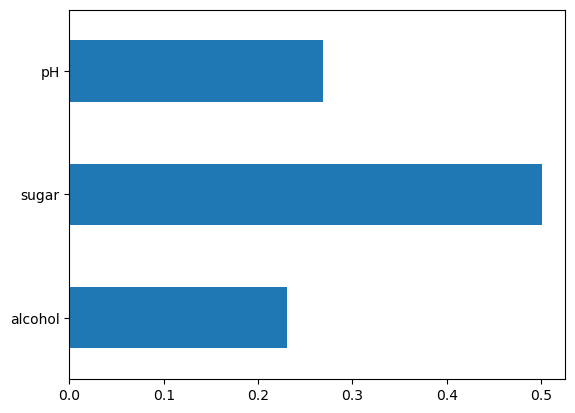

In [7]:
rf.fit(X_train, y_train)
feat_importances = pd.Series(rf.feature_importances_, index=['alcohol', 'sugar', 'pH'])
feat_importances.plot(kind='barh')

OOB(Out of bag) 샘플: 남는 샘플을 사용하여 부트스트랩 샘플의 훈련 점수를 평가할 수 있음.\
즉, 일종의 검증 세트 역할을 하는 셈.

In [8]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)
rf.oob_score_

0.8964787377333077

## Extra Tree

부트스트랩 샘플을 사용하지 않고, 결정트리를 만들 때 전체 훈련 세트를 사용함.

In [9]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9981720130385032 0.8924350336862368


<Axes: >

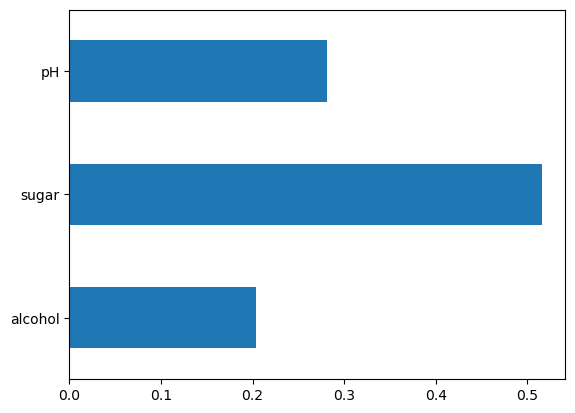

In [10]:
et.fit(X_train, y_train)
feat_importances = pd.Series(et.feature_importances_, index=['alcohol', 'sugar', 'pH'])
feat_importances.plot(kind='barh')

## Gradient Boosting

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X_train, y_train, return_train_score=True, n_jobs=-1)

# 과대적합에 강력함
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9442947291395691 0.8751179018286814


<Axes: >

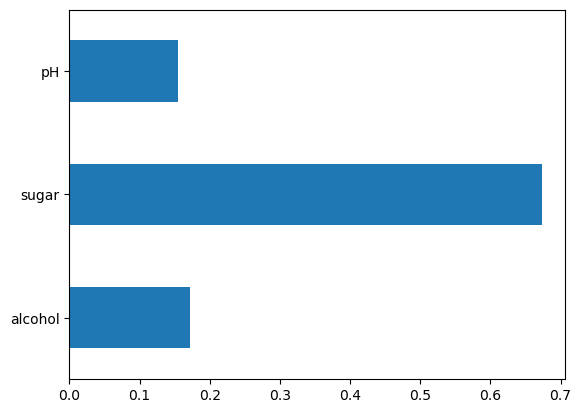

In [13]:
gb.fit(X_train, y_train)
feat_importances = pd.Series(gb.feature_importances_, index=['alcohol', 'sugar', 'pH'])
feat_importances.plot(kind='barh')

## Histogram-based Gradient Boosting

In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, X_train, y_train, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.930536541746549 0.8780021470348707


In [17]:
from sklearn.inspection import permutation_importance

hgb.fit(X_train, y_train)
result = permutation_importance(hgb, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.09374639 0.23954204 0.08664614]


In [18]:
result = permutation_importance(hgb, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.04953846 0.20176923 0.04776923]


In [19]:
hgb.score(X_test, y_test)

0.8776923076923077

## Other HGB

In [21]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9576196805448669 0.8803135411268231


In [22]:
from lightgbm import LGBMClassifier

xgb = LGBMClassifier(random_state=42)
scores = cross_validate(xgb, X_train, y_train, return_train_score=True)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

ModuleNotFoundError: No module named 'lightgbm'